In [13]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans # For clustering

In [6]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path) # takes image in BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB format

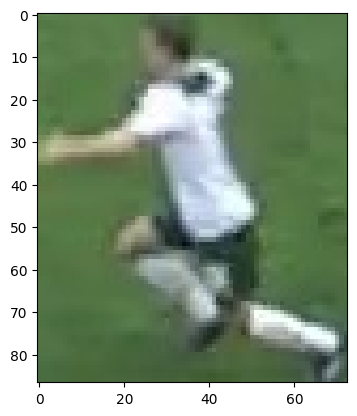

In [7]:

plt.imshow(image)
plt.show()

# take the top half of the image (there we can see the color clearly)

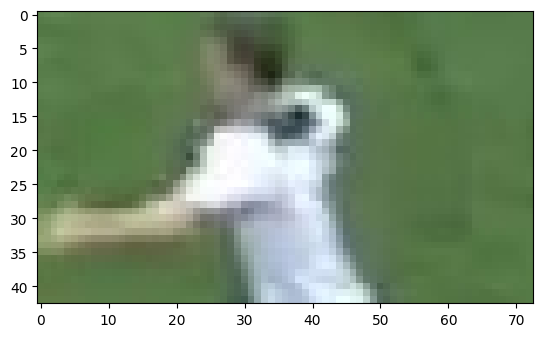

In [8]:
top_half = image[0: int(image.shape[0]/2), :] # take the top half of the image
plt.imshow(top_half)
plt.show()

# now we want to remove the background for take the t-shirt color, we do this with cluster, we cluster the image to 2 colors then we take the avg of t-shirt color

# cluster the image into 2 clusters

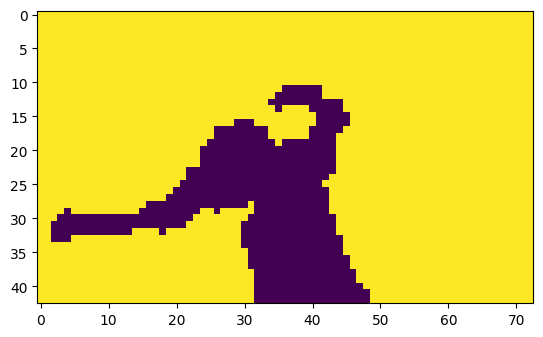

In [14]:
# change the image into 2d array
image_2d=top_half.reshape(-1,3) # -1 means that the value is inferred from the length of the array and remaining dimensions, 3 is the number RGB values

# perform kmeans clustering
kmeans=KMeans(n_clusters=2, random_state=0).fit(image_2d) # 2 clusters

# get the labels
labels=kmeans.labels_

#reshape the labels into the shape of the original image
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

# display the image
plt.imshow(clustered_image)
plt.show()





In [16]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]] # get the clusters of the corners
non_player_cluster=max(set(corner_clusters), key=corner_clusters.count) # get the cluster that is not the player, the number that appears the most in the corners
print("Non player cluster: ", non_player_cluster)


Non player cluster:  1


In [17]:
player_cluster=1-non_player_cluster # the player cluster is the opposite of the non player cluster
print("Player cluster: ", player_cluster)

Player cluster:  0


In [18]:
kmeans.cluster_centers_[player_cluster] # get the RGB values of the player cluster

array([198.9442446 , 208.93165468, 212.1294964 ])